In [1]:
%load_ext autoreload
%autoreload 2

# --- imports --

import importlib
import rossler_functions as rossler

import numpy as np
import matplotlib.pyplot as plt

# 3) The Rössler Attractor

## Introduction

The **Rössler system** is a three-dimensional chaotic dynamical system described by the following autonomous ordinary differential equations:

$$
\begin{align}
\dot{x} &= -y - z \\
\dot{y} &= x + ay \\
\dot{z} &= b + z(x - c)
\end{align}
$$

where $a$, $b$, and $c$ are positive parameters that control the system's behavior.


We will solve the system numerically, visualize the attractor in 2D and 3D, study how the attractor changes as parameters vary and analyze bifurcations and transitions to chaos.


An interesting aplication I found in [Electrical circuits](https://www.glensstuff.com/rosslerattractor/rossler.htm), where they use the oscilloscope to accomplish the Rössler attractor.


## 3.1) The Rössler Attractor with Default Parameters

Let us start with the classic chaotic parameter regime. The most commonly studied case uses:
- $a = 0.2$
- $b = 0.2$
- $c = 5.7$

These parameters are also used on the [wikipedia](https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) site, they place the system in the chaotic regime producing a good looking visually strange attractor.

In [2]:
# --- parameters (printed via helper) ---
a, b, c, t_min, t_max, dt, initial_condition, initial_conditions = rossler.nb_print_parameters()

Parameters: a=0.2, b=0.2, c=5.7
Time: t_min=0.0, t_max=200.0, dt=0.01


Further in this notebook you may see $h$ instead of $dt$, note that they have the same meaning of the time step.

The equilibria are:

In [3]:
rossler.show_solutions()

Solution 1:
 X = c/2 - sqrt(-4*a*b + c**2)/2 Y = (-c + sqrt(-4*a*b + c**2))/(2*a) Z = c/(2*a) - sqrt(-4*a*b + c**2)/(2*a) 

Solution 2:
 X = c/2 + sqrt(-4*a*b + c**2)/2 Y = (-c - sqrt(-4*a*b + c**2))/(2*a) Z = c/(2*a) + sqrt(-4*a*b + c**2)/(2*a) 



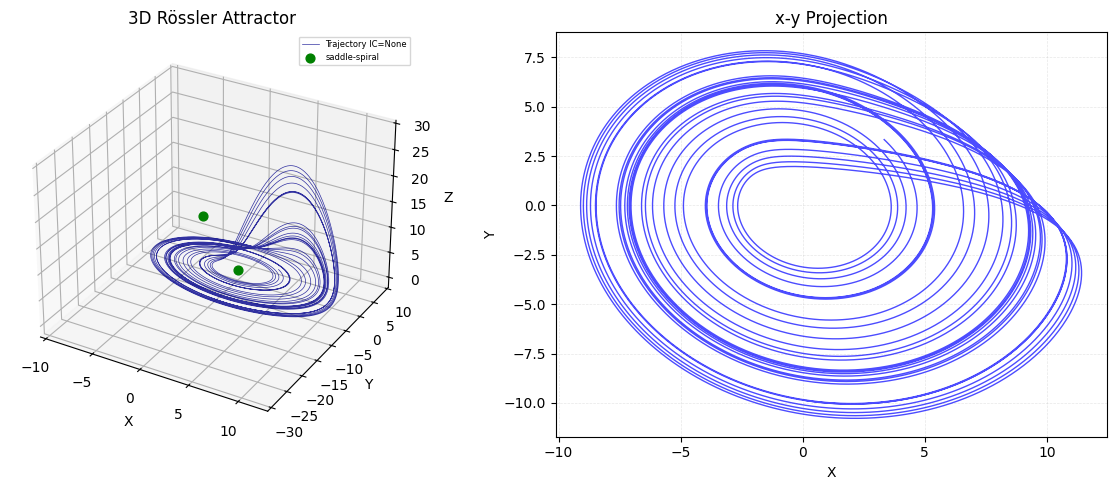

In [4]:
# --- Part 3.1: Basic Visualization ---
rossler.nb_show_attractor(a=a, b=b, c=c, initial_condition=initial_condition, t_min=t_min, t_max=t_max, dt=dt)

**Observations:**

The Rössler attractor displays characteristic features:

1. **Two-lobe structure**: The attractor has two distinct spiral regions, resembling a twisted ribbon or "almost closed" loop.
2. **Fractal properties**: The structure contains fine details at all scales, indicating a strange attractor.
3. **Invariance**: The 3D projection shows how trajectories approach and stay within the attractor region, while different initial conditions all converge to the same set.

The **x-y projection** reveals the primary folding structure, while the **x-z projection** shows the vertical extent of the oscillations.


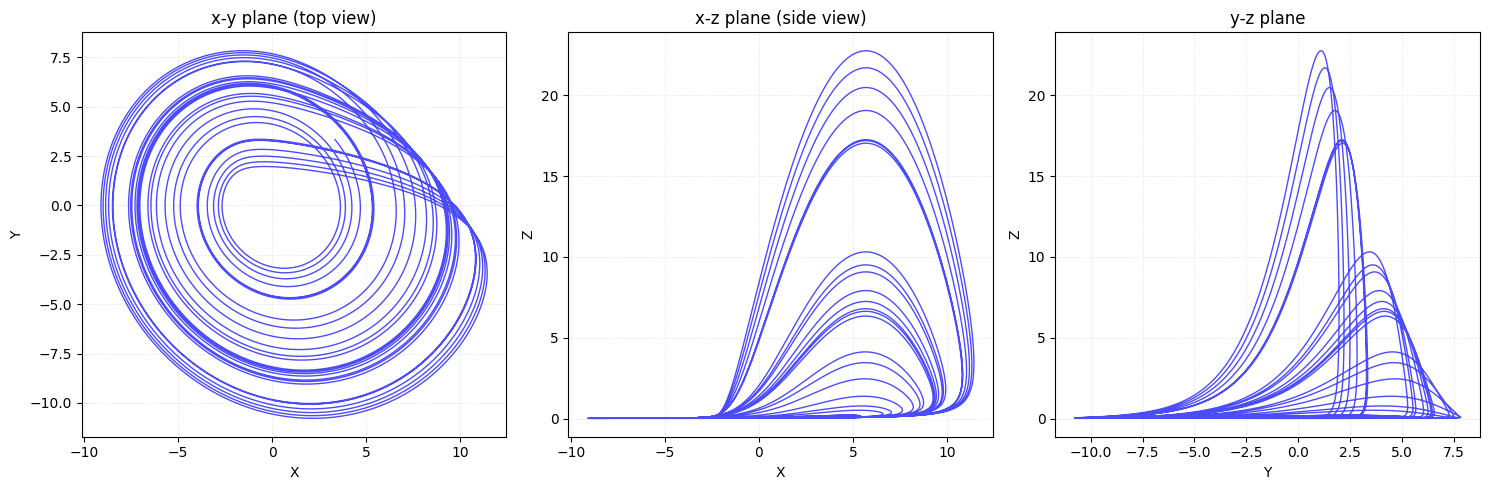

In [5]:
# --- All three 2D projections ---
rossler.nb_show_projections(a=0.2, b=0.2, c=5.7, initial_condition=initial_condition, t_min=t_min, t_max=t_max, dt=dt)

## 3.2) Time Series Analysis

To better understand the dynamics, we examine how each component $x(t)$, $y(t)$, and $z(t)$ evolves in time.


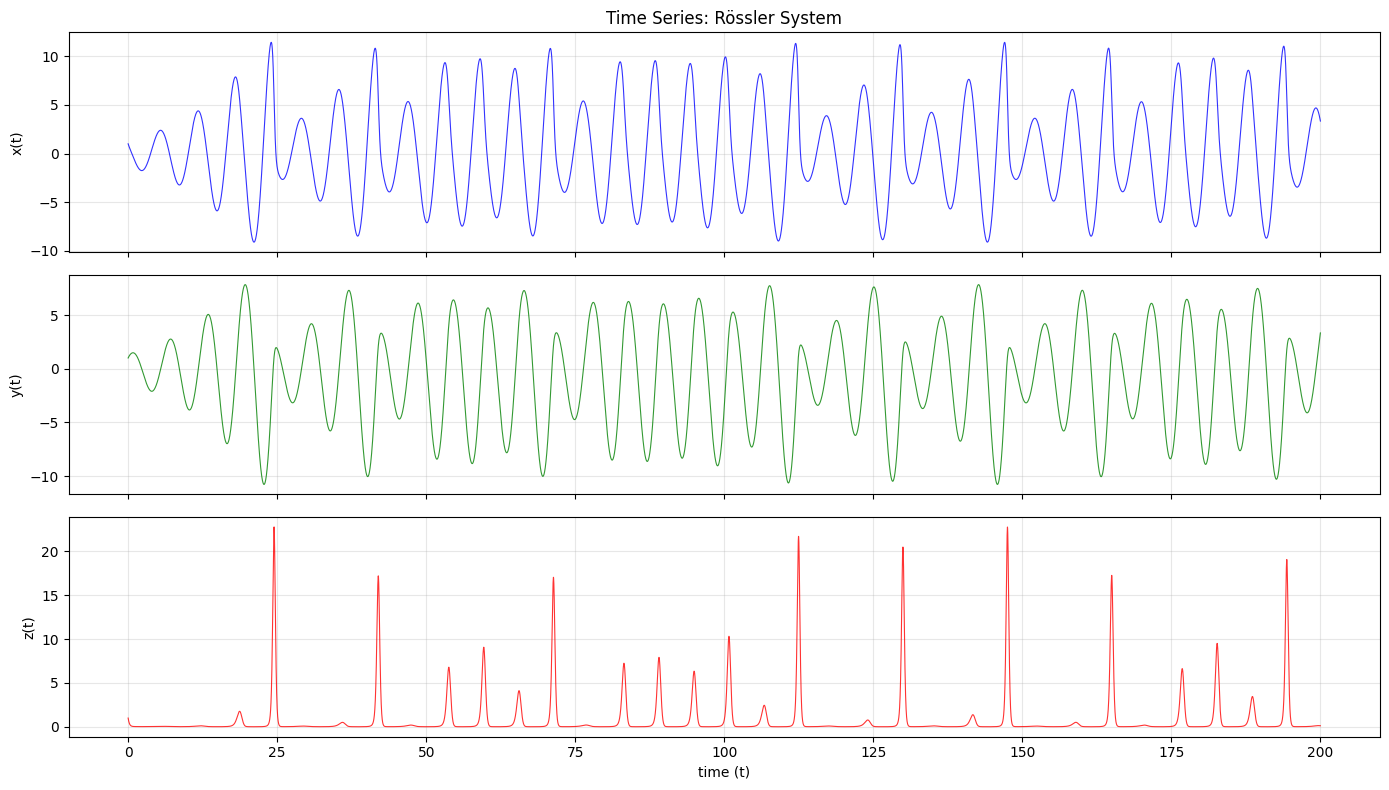

In [6]:
# --- Part 3.2: Time Series ---
rossler.nb_time_series(a=a, b=b, c=c, initial_condition=initial_condition, t_min=t_min, t_max=t_max, dt=dt)

**Key features of the time series:**

1. **Aperiodicity**: The signals never repeat exactly—they are chaotic.
2. **Bounded motion**: Despite the apparent randomness, $x(t)$, $y(t)$, and $z(t)$ remain bounded, confined to the attractor region.
3. **Multiple scales**: The time series exhibit oscillations at multiple frequencies, giving the appearance of noise but actually following deterministic rules.
4. **Sensitive dependence on initial conditions**: Two trajectories starting very close together would diverge exponentially.

---

## 3.3) Effect of Initial Conditions

Let's verify that different initial conditions converge to the same attractor.


/Users/tristancools/Documents/VSC_macbook_tristan/Biophysics/Examen/Exam-part-3/rossler_functions.py:1159: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best', fontsize=9)


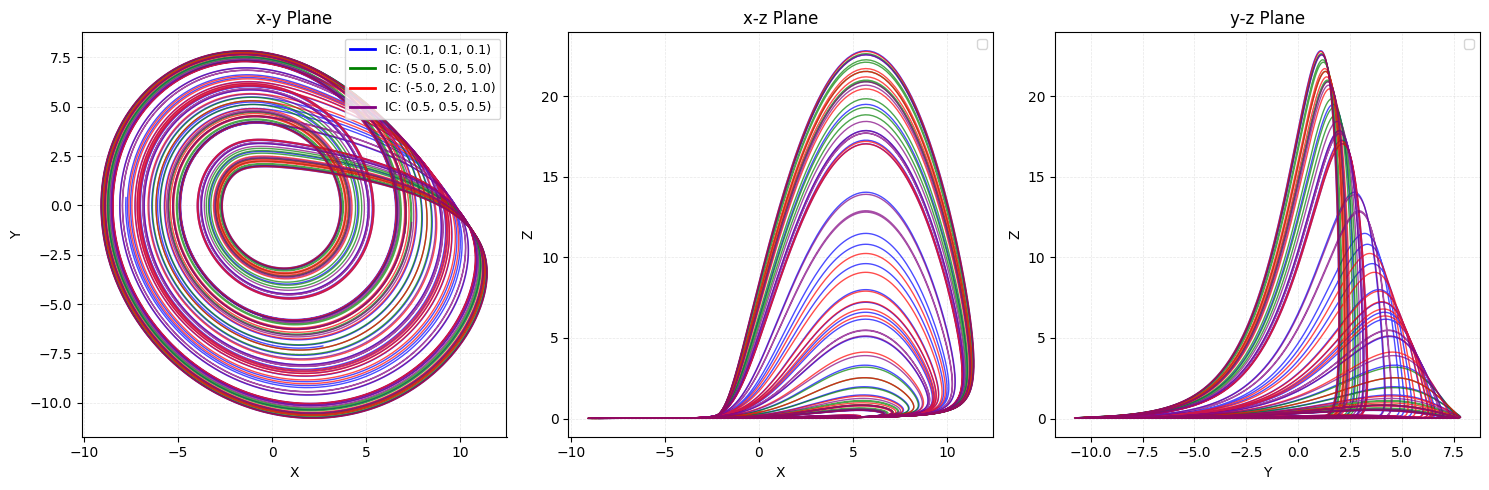

In [7]:
# --- Part 3.3: Compare Different Initial Conditions ---
initial_conditions = [
    (0.1, 0.1, 0.1),
    (5.0, 5.0, 5.0),
    (-5.0, 2.0, 1.0),
    (0.5, 0.5, 0.5)
]

rossler.nb_compare_initial_conditions(a=a, b=b, c=c,
                                      initial_conditions=initial_conditions,
                                      t_min=t_min, t_max=t_max, dt=dt)

**Conclusion:**

All trajectories, regardless of their starting point, eventually converge to the **same attractor**. This is a fundamental property of attractors: they are invariant sets that capture the long-term behavior of the system.

---

## Determing chaos in 2 different ways

## Return Map

The Rössler attractor exhibits a characteristic return map from the local maxima of $z(t)$.

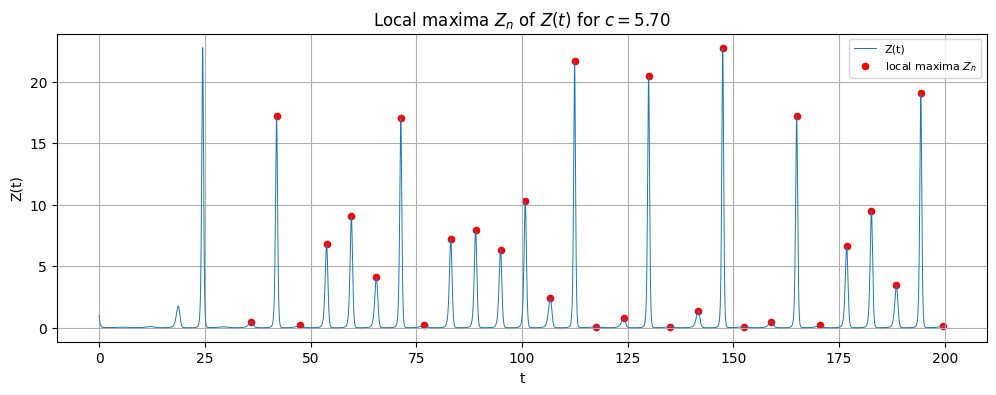

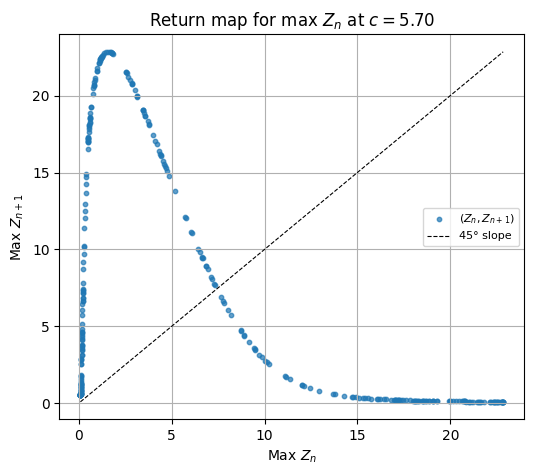

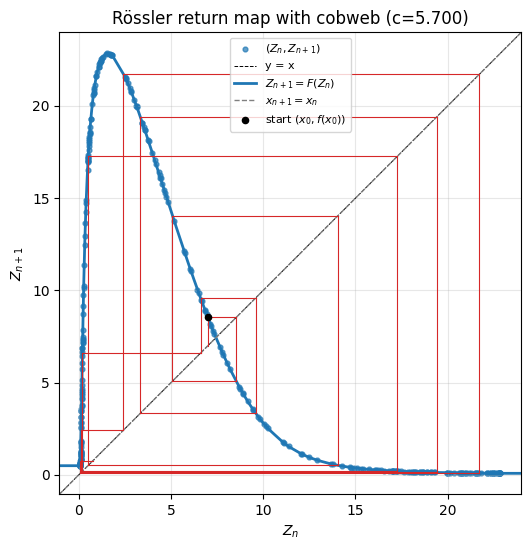

In [8]:
# Return map + cobweb in one go
rossler.nb_return_map_and_cobweb(a=a, b=b, c=5.7, initial_condition=initial_condition,
                                 t_min=t_min, t_max=2000, dt=dt,
                                 skip_first_maxima=5, cobweb_skip_first=50, n_iter=15)

**Sensitivity to Initial Conditions**

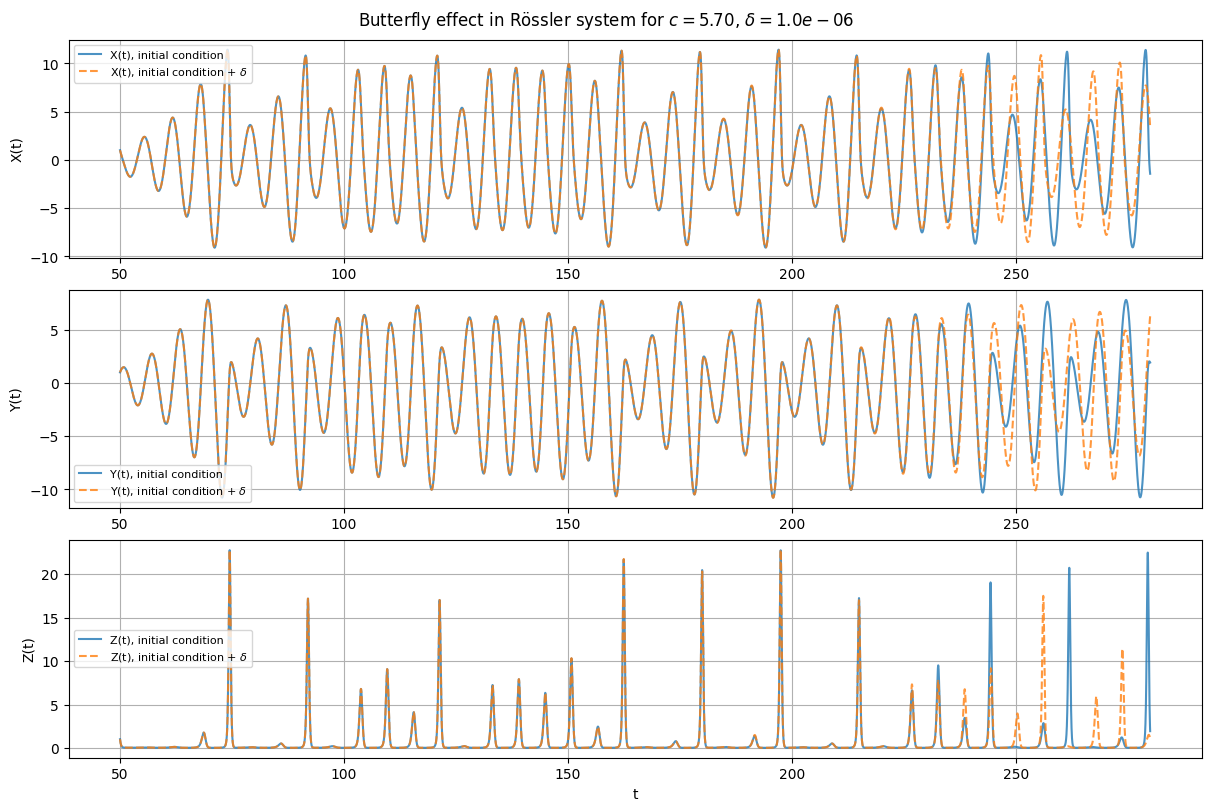

In [9]:
rossler.nb_butterfly_effect(a=a, b=b, c=5.7, initial_condition=initial_condition,
                             delta=1e-6, t_min=50, t_max=280, dt=dt)

The Rössler system shows chaotic behavior with high sensitivity to initial conditions.

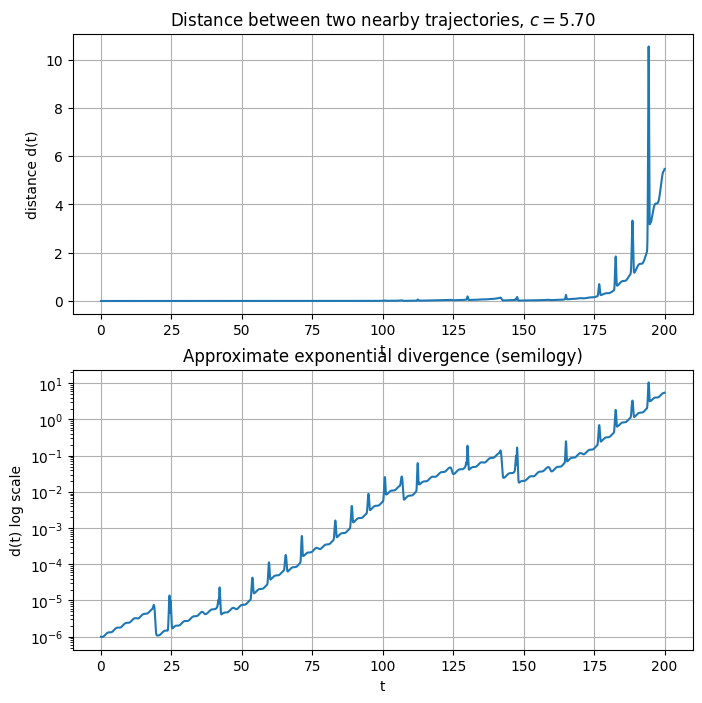

In [10]:
rossler.nb_plot_sensitivity(c=5.7, t_min=t_min, t_max=t_max, dt=dt, delta=1e-6)



**Parameter Sweep: Exploring the Effect of Parameter $c$**

The parameter $c$ appears in the third equation and influences the z-component dynamics. By varying $c$, we can observe how the attractor shape and dynamics change, and eventually witness a transition from periodic to chaotic behavior.


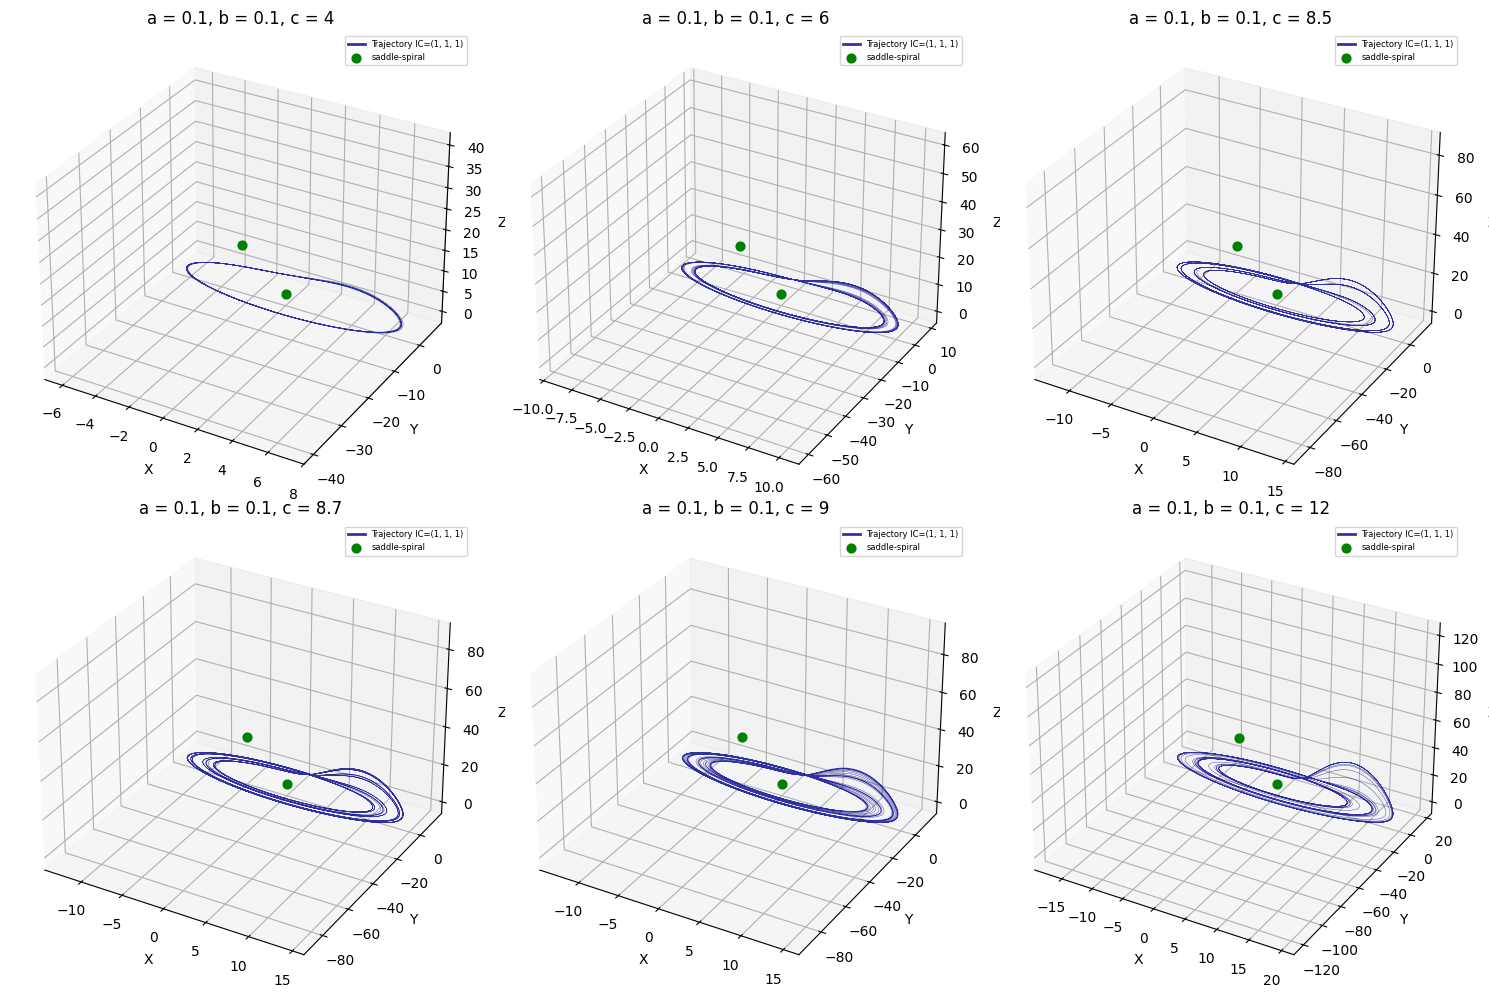

In [20]:
# --- Part 3.4: Parameter Sweep in c ---
rossler.nb_parameter_sweep(c_values=[4, 6, 8.5, 8.7, 9, 12], a=0.1, b=0.1, initial_condition=initial_condition,
                           t_min=t_min, t_max=200, dt=dt)

**Observations as $c$ increases:**

The Rössler system exhibits a rich **route to chaos** through **period-doubling bifurcations** as parameter $c$ varies. According to the bifurcation analysis with $a = b = 0.1$:

- **$c = 4$**: **Period-1 orbit** – The system exhibits a simple periodic cycle with one loop per period, visible as a clean single-loop attractor.

- **$c = 6$**: **Period-2 orbit** – The system has undergone the first period-doubling bifurcation, now completing two distinct loops before repeating.

- **$c = 8.5$**: **Period-4 orbit** – Further period-doubling creates a more complex periodic structure with four loops. The attractor begins to fill more of the phase space.

- **$c = 8.7$**: **Period-8 orbit** – Another period-doubling brings the system closer to chaos. The attractor shows eight distinct loops with increasingly complex folding.

- **$c = 9$**: **Sparse chaotic attractor** – The system has transitioned into chaos. The attractor is no longer periodic but exhibits sensitive dependence on initial conditions, though still relatively sparse in structure.

- **$c = 12$**: **Period-3 orbit** – A periodic window appears within the chaotic regime, demonstrating that chaos can be interrupted by regions of periodic behavior. This period-3 orbit is particularly significant as it indicates (by Sharkovskii's theorem) the presence of orbits of all periods.

This sequence demonstrates the **Feigenbaum route to chaos** through period-doubling cascades, interspersed with **periodic windows** at higher $c$ values. The transition from simple periodic orbits through successive doublings to fully developed chaotic attractors is a universal feature of many nonlinear dynamical systems. As Wikipedia notes, "low values of $c$ are periodic, but quickly become chaotic as $c$ increases," with sections of periodicity reappearing within the chaotic regime.

---

## 3.5) Bifurcation Diagram

A bifurcation diagram shows how the long-term behavior of the system changes as a parameter varies. We will plot the local maxima of $x(t)$ as a function of parameter $a$.

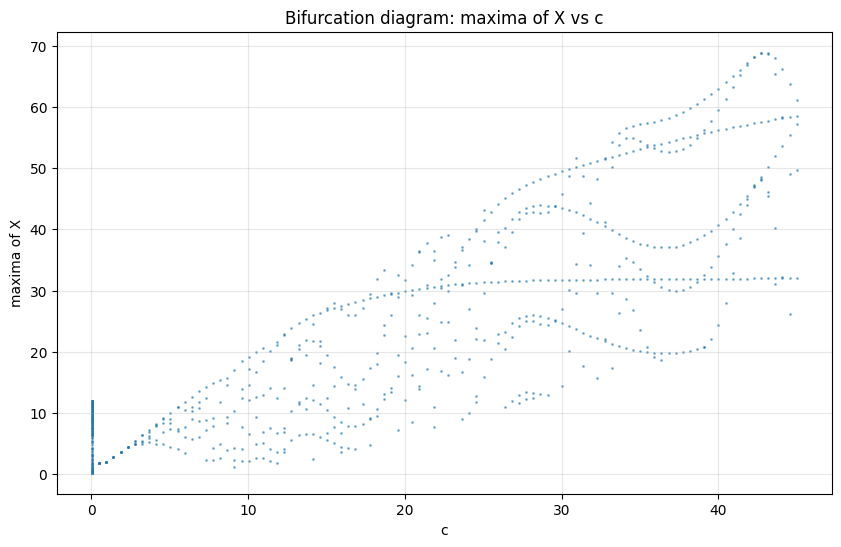

In [12]:
# --- Part 3.5: Bifurcation Diagram ---
# Use the dedicated bifurcation functions
fig = rossler.nb_bifurcation_vs_c(a=a, b=b, c_min=0.05, c_max=45, n=100,
                                   ic=initial_condition, t_min=0, t_max=60, h=0.01)


**Bifurcation diagram interpretation:**

- **Low $c$ values**: Fewer points, indicating periodic or simpler behavior with stable limit cycles.
- **Intermediate $c$ values**: The cloud of points thickens, showing chaotic behavior with a continuous range of visited states. This is the chaotic regime where the strange attractor exists.
- **Higher $c$ values**: The structure evolves further, potentially showing different periodic windows and transitions between order and chaos.

This diagram is analogous to the famous **logistic map bifurcation diagram** but for a continuous 3D system. It reveals the rich dynamical behavior as parameter $c$ varies.


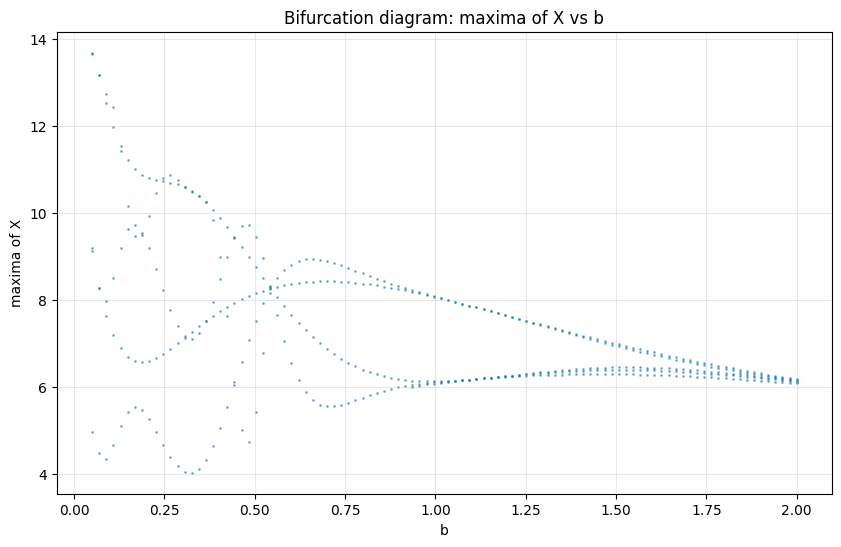

In [13]:
fig = rossler.nb_bifurcation_vs_b(a=a, c=c, b_min=0.05, b_max=2, n=100,
                                   ic=initial_condition, t_min=0, t_max=60, h=0.01)

---

**Summary**

---


The Rössler system demonstrates fundamental principles of chaos and nonlinear dynamics:

1. **Strange Attractors**: Even though the system is deterministic, its long-term behavior cannot be predicted precisely due to sensitive dependence on initial conditions.

2. **Deterministic Chaos**: The system is governed by fixed equations, yet it produces aperiodic (non-repeating) trajectories confined to an attractor.

3. **Parameter Sensitivity**: Small changes in parameters like $c$ lead to qualitatively different behavior—bifurcations mark the transitions between different dynamical regimes.

4. **Universality**: The route to chaos observed in the Rössler system appears in many other physical systems, from fluid dynamics to chemical reactions to ecological models.

5. **Prediction Limits**: While the system is deterministic, practical prediction of specific future states is impossible beyond a certain time horizon due to exponential divergence (as quantified by the Lyapunov exponent).


## 3.6) Euler vs RK4: automatische stapgrootte
Deze sectie gebruikt de nieuwe functie `find_euler_dt_for_rk4_precision` om een Euler-stapgrootte te kiezen die een fout oplevert vergelijkbaar met een referentie-RK4 met `h=0.1`. Daarna leggen we Euler en RK4 naast elkaar.

In [14]:
# Bepaal een passende Euler-stap h voor vergelijkbare precisie t.o.v. RK4 (h=0.1)
h_best, err_best = rossler.find_euler_dt_for_rk4_precision(
    a=a, b=b, c=c, ic=initial_condition,
    t_min=0.0, t_max=60.0,
    h_rk4=0.1, h0_euler=0.1, max_halvings=20
)
print(f"Beste Euler-stap h: {h_best:.6f} | Max fout t.o.v. RK4: {err_best:.3e}")

/Users/tristancools/Documents/VSC_macbook_tristan/Biophysics/Examen/Exam-part-3/rossler_functions.py:124: RuntimeWarning: overflow encountered in scalar multiply
  dz = b + z * (x - c)
/Users/tristancools/Documents/VSC_macbook_tristan/Biophysics/Examen/Exam-part-3/rossler_functions.py:651: RuntimeWarning: invalid value encountered in add
  X[i + 1] = X[i] + h * rossler_rhs(X[i], a=a, b=b, c=c)


Beste Euler-stap h: 0.000195 | Max fout t.o.v. RK4: 3.246e-01


Max |Δx|: 1.642e-01 | Max |Δy|: 9.208e-02 | Max |Δz|: 3.246e-01


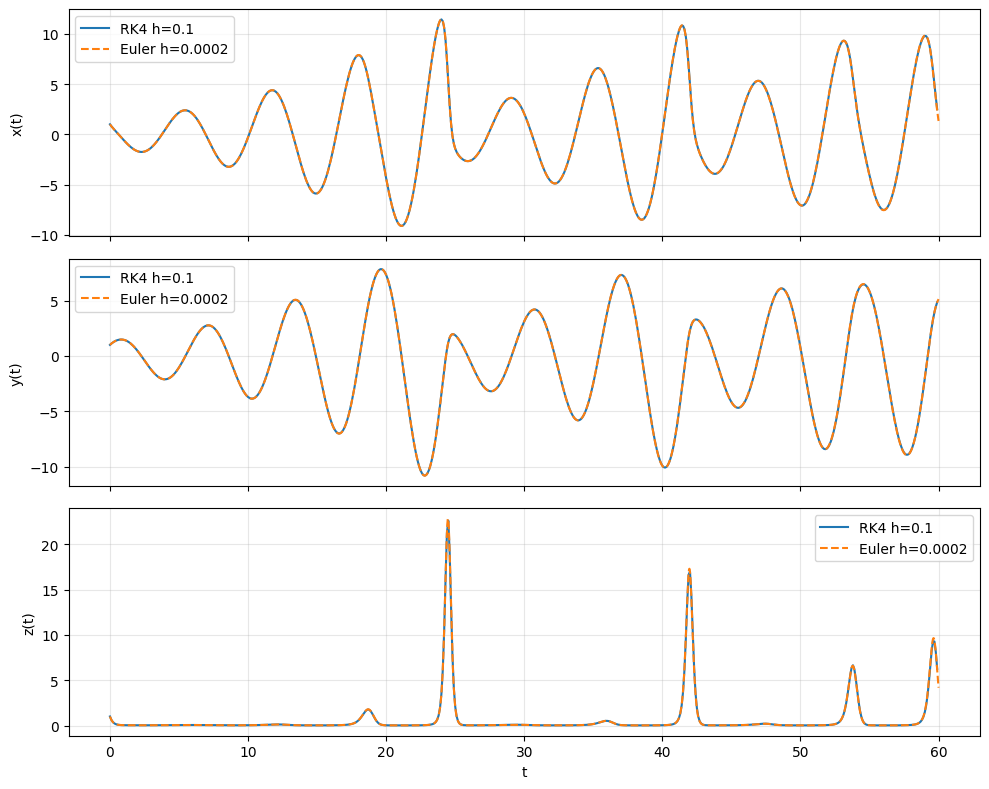

In [15]:
# Vergelijk Euler (met gevonden h_best) en RK4 (h=0.1)
t_ref, x_ref, y_ref, z_ref = rossler.rk4_integrate_rossler(a, b, c, initial_condition, 0.0, 60.0, 0.1)
t_eu, x_eu, y_eu, z_eu = rossler.euler_integrate_rossler(a, b, c, initial_condition, 0.0, 60.0, h_best)

# Interpoleer Euler-resultaten op RK4-grid voor fout-inschatting
x_eu_on_ref = np.interp(t_ref, t_eu, x_eu)
y_eu_on_ref = np.interp(t_ref, t_eu, y_eu)
z_eu_on_ref = np.interp(t_ref, t_eu, z_eu)

err_x = np.abs(x_eu_on_ref - x_ref)
err_y = np.abs(y_eu_on_ref - y_ref)
err_z = np.abs(z_eu_on_ref - z_ref)

print(f"Max |Δx|: {err_x.max():.3e} | Max |Δy|: {err_y.max():.3e} | Max |Δz|: {err_z.max():.3e}")

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axes[0].plot(t_ref, x_ref, label='RK4 h=0.1')
axes[0].plot(t_eu, x_eu, '--', label=f'Euler h={h_best:.4f}')
axes[0].set_ylabel('x(t)')
axes[0].grid(True, alpha=0.3)
axes[0].legend(loc='best')

axes[1].plot(t_ref, y_ref, label='RK4 h=0.1')
axes[1].plot(t_eu, y_eu, '--', label=f'Euler h={h_best:.4f}')
axes[1].set_ylabel('y(t)')
axes[1].grid(True, alpha=0.3)
axes[1].legend(loc='best')

axes[2].plot(t_ref, z_ref, label='RK4 h=0.1')
axes[2].plot(t_eu, z_eu, '--', label=f'Euler h={h_best:.4f}')
axes[2].set_ylabel('z(t)')
axes[2].set_xlabel('t')
axes[2].grid(True, alpha=0.3)
axes[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [16]:
# Force reload of the module to pick up latest definitions
import importlib
importlib.reload(rossler)

<module 'rossler_functions' from '/Users/tristancools/Documents/VSC_macbook_tristan/Biophysics/Examen/Exam-part-3/rossler_functions.py'>